In [24]:
import TADcalling
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
TADcalling.set_verbosity('DEBUG')

In [3]:
lc = TADcalling.LavaburstCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

DEBUG:TADcalling:Initializing from files: ['../data/S2.20000.cool']


In [134]:
lc.call({'gamma':np.arange(-3,6,0.01), 'method':['armatus', 'modularity']}, max_intertad_size=2)

DEBUG:TADcalling:Calling LavaburstCaller with params: {'gamma': array([ -3.00000000e+00,  -2.99000000e+00,  -2.98000000e+00,
        -2.97000000e+00,  -2.96000000e+00,  -2.95000000e+00,
        -2.94000000e+00,  -2.93000000e+00,  -2.92000000e+00,
        -2.91000000e+00,  -2.90000000e+00,  -2.89000000e+00,
        -2.88000000e+00,  -2.87000000e+00,  -2.86000000e+00,
        -2.85000000e+00,  -2.84000000e+00,  -2.83000000e+00,
        -2.82000000e+00,  -2.81000000e+00,  -2.80000000e+00,
        -2.79000000e+00,  -2.78000000e+00,  -2.77000000e+00,
        -2.76000000e+00,  -2.75000000e+00,  -2.74000000e+00,
        -2.73000000e+00,  -2.72000000e+00,  -2.71000000e+00,
        -2.70000000e+00,  -2.69000000e+00,  -2.68000000e+00,
        -2.67000000e+00,  -2.66000000e+00,  -2.65000000e+00,
        -2.64000000e+00,  -2.63000000e+00,  -2.62000000e+00,
        -2.61000000e+00,  -2.60000000e+00,  -2.59000000e+00,
        -2.58000000e+00,  -2.57000000e+00,  -2.56000000e+00,
        -2.55000000e+

In [135]:
df = lc.segmentation2df()

In [136]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

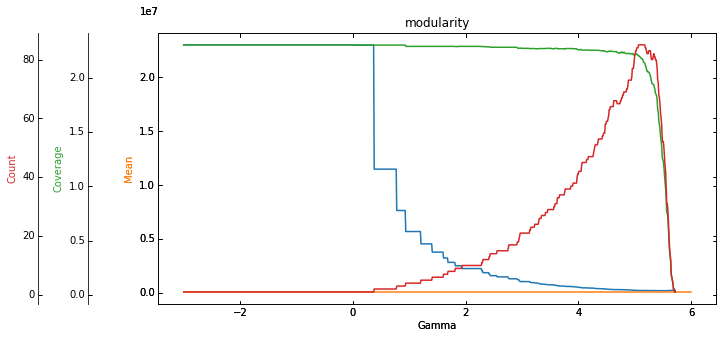

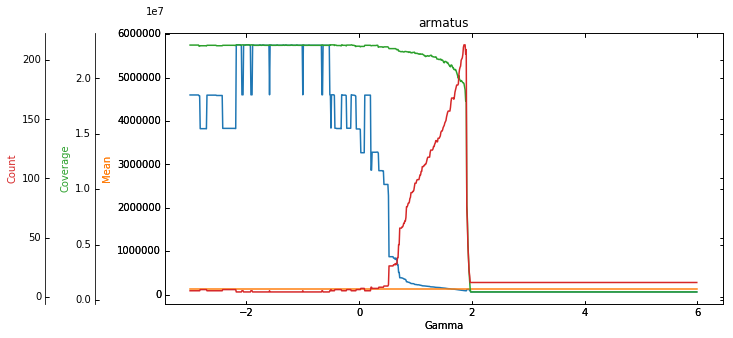

In [137]:
for method in ['modularity', 'armatus']:
    
    gr_mean = df.query('method=="{}"'.format(method)).groupby(['gamma', 'method']).mean().reset_index().sort_values(['method', 'gamma'])
    #gr_median = df.query('method=="{}"'.format(method)).groupby(['gamma', 'method']).median().reset_index().sort_values(['method', 'gamma'])
    gr_count = df.query('method=="{}"'.format(method)).groupby(['gamma', 'method']).count().reset_index().sort_values(['method', 'gamma'])
    gr_cov = df.query('method=="{}"'.format(method)).groupby(['gamma', 'method']).sum().reset_index().sort_values(['method', 'gamma'])

    plt.figure(figsize=[10,5])
    host = host_subplot(111, axes_class=AA.Axes)

    par1 = host.twinx()
    par2 = host.twinx()

    offset = 70
    new_fixed_axis = par1.get_grid_helper().new_fixed_axis
    par1.axis["left"] = new_fixed_axis(loc="left",
                                        axes=par1,
                                        offset=(-offset, 0))


    offset = 120
    new_fixed_axis = par2.get_grid_helper().new_fixed_axis
    par2.axis["left"] = new_fixed_axis(loc="left",
                                        axes=par2,
                                        offset=(-offset, 0))

    host.set_xlabel("Gamma")
    host.set_ylabel("Mean")
    par1.set_ylabel("Coverage")
    par2.set_ylabel("Count")

    p1, = host.plot(gr_mean.gamma,   gr_mean.length,   label="{} mean".format(method))
    p1, = host.plot([-3,6], [120000, 120000])
    p2, = par1.plot(gr_cov.gamma, gr_cov.length, label="{} coverage".format(method))
    p3, = par2.plot(gr_count.gamma,  gr_count.length,  label="{} count".format(method))

    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["left"].label.set_color(p2.get_color())
    par2.axis["left"].label.set_color(p3.get_color())
    
    plt.title(method)

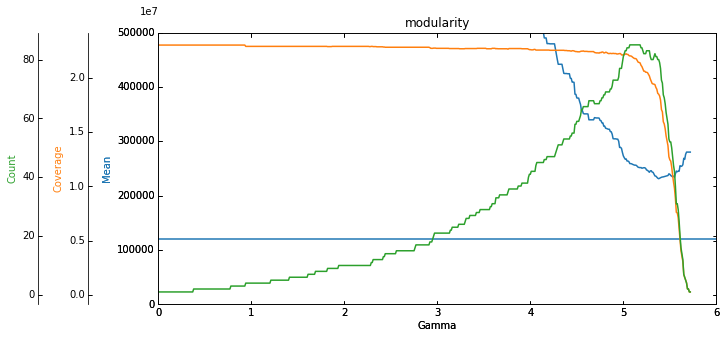

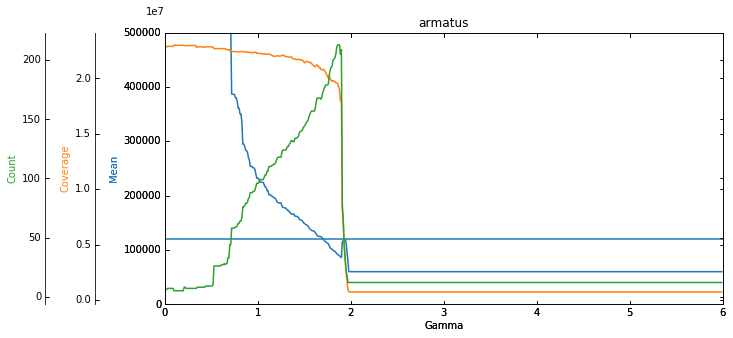

In [138]:
for method in ['modularity', 'armatus']:
    
    gr_mean = df.query('method=="{}"'.format(method)).groupby(['gamma', 'method']).mean().reset_index().sort_values(['method', 'gamma'])
    #gr_median = df.query('method=="{}"'.format(method)).groupby(['gamma', 'method']).median().reset_index().sort_values(['method', 'gamma'])
    gr_count = df.query('method=="{}"'.format(method)).groupby(['gamma', 'method']).count().reset_index().sort_values(['method', 'gamma'])
    gr_cov = df.query('method=="{}"'.format(method)).groupby(['gamma', 'method']).sum().reset_index().sort_values(['method', 'gamma'])

    plt.figure(figsize=[10,5])
    host = host_subplot(111, axes_class=AA.Axes)

    par1 = host.twinx()
    par2 = host.twinx()

    offset = 70
    new_fixed_axis = par1.get_grid_helper().new_fixed_axis
    par1.axis["left"] = new_fixed_axis(loc="left",
                                        axes=par1,
                                        offset=(-offset, 0))


    offset = 120
    new_fixed_axis = par2.get_grid_helper().new_fixed_axis
    par2.axis["left"] = new_fixed_axis(loc="left",
                                        axes=par2,
                                        offset=(-offset, 0))

    host.set_xlabel("Gamma")
    host.set_ylabel("Mean")
    par1.set_ylabel("Coverage")
    par2.set_ylabel("Count")

    p1, = host.plot(gr_mean.gamma,   gr_mean.length,   label="{} mean".format(method))
    p1, = host.plot([-3,6], [120000, 120000], color=p1.get_color())
    p2, = par1.plot(gr_cov.gamma, gr_cov.length, label="{} coverage".format(method))
    p3, = par2.plot(gr_count.gamma,  gr_count.length,  label="{} count".format(method))

    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["left"].label.set_color(p2.get_color())
    par2.axis["left"].label.set_color(p3.get_color())
    
    host.set_xlim([0, 6])
    host.set_ylim([0, 500000])

    plt.title(method)

In [139]:
import cooler
cool_file = '../data/S2.20000.cool'
mtx = cooler.Cooler(cool_file).matrix(balance=True, as_pixels=False).fetch('chr2L')
np.fill_diagonal(mtx, 0)

In [140]:
tads = df.query("method=='armatus'&abs(gamma-1.5)<0.005")[['bgn', 'end']].values/20000

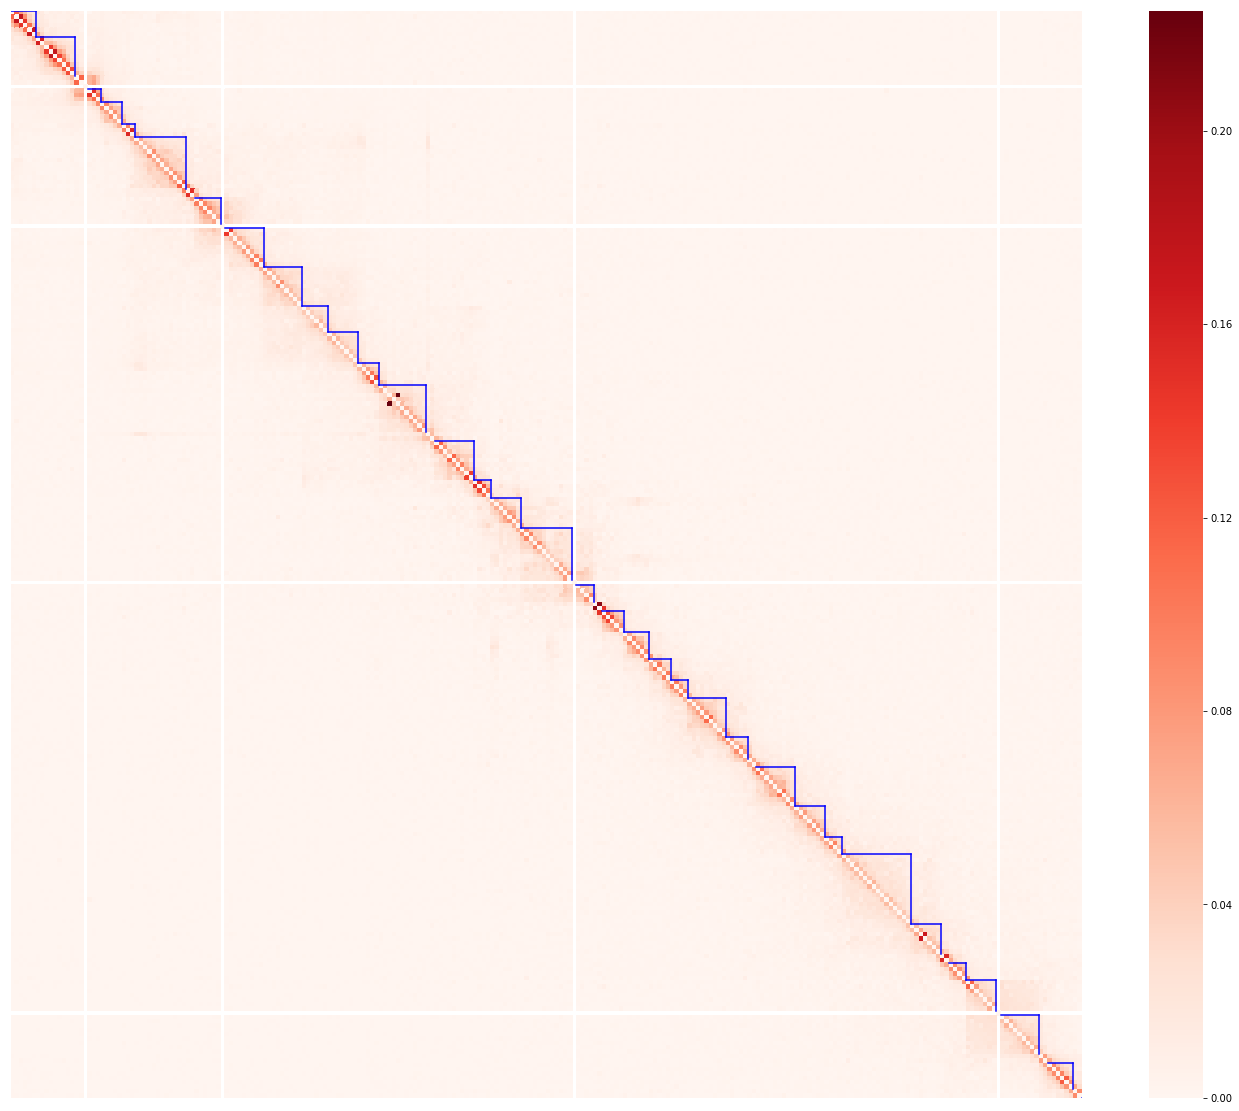

In [141]:
bgn = 0
end = 250
tads_color = 'blue'

# plot tuning
plt.figure(figsize=(24,20))
sns.heatmap(mtx[bgn:end, bgn:end], cmap='Reds')
plt.xticks([])
plt.yticks([])

for i in tads:
    tad_bgn = i[0] - bgn
    tad_end = i[1] - bgn
    plt.plot([tad_bgn, tad_end], [tad_bgn, tad_bgn], color=tads_color)
    plt.plot([tad_end, tad_end], [tad_bgn, tad_end], color=tads_color)